# Import necessary libraries
------------------------------------------------

In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import seaborn as sns
sns.set()
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

In [2]:
df=pd.read_csv("Downloads/archive/Crimes_With_Dates_Cleaned.csv",low_memory=False)

In [3]:
df.describe()

,Unnamed: 0,Incident ID,CR Number,Victims,Zip Code,Address Number,Latitude,Longitude,Year,Month,Day
count,306094.000000,3.060940e+05,3.060940e+05,306094.000000,302915.000000,2.799850e+05,306094.000000,306094.000000,306094.000000,306094.000000,306094.000000
mean,153046.500000,2.012369e+08,1.692787e+08,1.022692,20876.535939,8.393001e+03,38.146328,-75.269490,2018.876577,6.590917,15.535888
std,88361.870986,8.626185e+04,6.210304e+07,0.192311,170.157722,1.526296e+04,5.974082,11.786118,1.801537,3.415133,8.874160
min,0.000000,2.010871e+08,1.001107e+07,1.000000,6.000000,1.000000e+00,0.000000,-77.516753,2016.000000,1.000000,1.000000
25%,76523.250000,2.011625e+08,1.705431e+08,1.000000,20853.000000,1.600000e+03,39.020392,-77.197117,2017.000000,4.000000,8.000000
50%,153046.500000,2.012361e+08,1.900183e+08,1.000000,20878.000000,8.100000e+03,39.072844,-77.099464,2019.000000,7.000000,16.000000
75%,229569.750000,2.013109e+08,2.000466e+08,1.000000,20904.000000,1.250000e+04,39.142072,-77.029046,2020.000000,10.000000,23.000000
max,306093.000000,2.013872e+08,2.204211e+08,22.000000,29882.000000,2.090600e+06,90.000000,0.000000,2022.000000,12.000000,31.000000


In [4]:
df.columns

Index(['Unnamed: 0', 'Incident ID', 'Offence Code', 'CR Number',
       'Dispatch Date / Time', 'NIBRS Code', 'Victims', 'Crime Name1',
       'Crime Name2', 'Crime Name3', 'Police District Name', 'Block Address',
       'City', 'State', 'Zip Code', 'Agency', 'Place', 'Sector', 'Beat', 'PRA',
       'Address Number', 'Street Prefix', 'Street Name', 'Street Suffix',
       'Street Type', 'Start_Date_Time', 'End_Date_Time', 'Latitude',
       'Longitude', 'Police District Number', 'Location', 'Year', 'Month',
       'Year-Month', 'Day', 'Committed_At_Morning'],
      dtype='object')

In [5]:
# Display counts of unique values for each column
for column in df.columns:
    value_counts = df[column].value_counts()
    print(f"Column: {column}")
    print(value_counts)
    print("\n")

Column: Unnamed: 0
0         1
204067    1
204065    1
204064    1
204063    1
         ..
102032    1
102031    1
102030    1
102029    1
306093    1
Name: Unnamed: 0, Length: 306094, dtype: int64


Column: Incident ID
201168542    9
201267256    8
201087295    8
201231948    8
201189600    8
            ..
201300561    1
201328626    1
201287756    1
201316229    1
201327806    1
Name: Incident ID, Length: 280928, dtype: int64


Column: Offence Code
2305    26275
9199    18489
1399    17441
2303    16076
3562    15613
        ...  
4808        1
5402        1
0904        1
4806        1
5199        1
Name: Offence Code, Length: 348, dtype: int64


Column: CR Number
170550978    9
180025771    8
190013350    8
190057156    8
16033468     8
            ..
210000371    1
200032168    1
200018237    1
200020287    1
210014587    1
Name: CR Number, Length: 280893, dtype: int64


Column: Dispatch Date / Time
12/02/2019 04:39:39 PM    48
12/30/2021 08:54:56 AM    10
11/26/2019 05:45:19 PM  

In [6]:
df['State'].unique()

array(['MD', 'DC', '16', 'VA', 'ND', '15', 'ME', 'MS', '0', 'MC', '17'],
      dtype=object)

In [7]:
df['State'] = df['State'].apply(lambda x: x if not x.isdigit() else None)
df.dropna(subset=['State'], inplace=True)
df['State'].unique()

array(['MD', 'DC', 'VA', 'ND', 'ME', 'MS', 'MC'], dtype=object)

# NULL VALUES
---------------------

In [8]:
df.isnull().sum()

Unnamed: 0                     0
Incident ID                    0
Offence Code                   0
CR Number                      0
Dispatch Date / Time       48892
NIBRS Code                     0
Victims                        0
Crime Name1                  272
Crime Name2                  272
Crime Name3                  272
Police District Name          94
Block Address              26178
City                        1276
State                          0
Zip Code                    3165
Agency                         0
Place                          0
Sector                      1527
Beat                        1527
PRA                          237
Address Number             26081
Street Prefix             292278
Street Name                    1
Street Suffix             300474
Street Type                  339
Start_Date_Time                0
End_Date_Time             161515
Latitude                       0
Longitude                      0
Police District Number         0
Location  

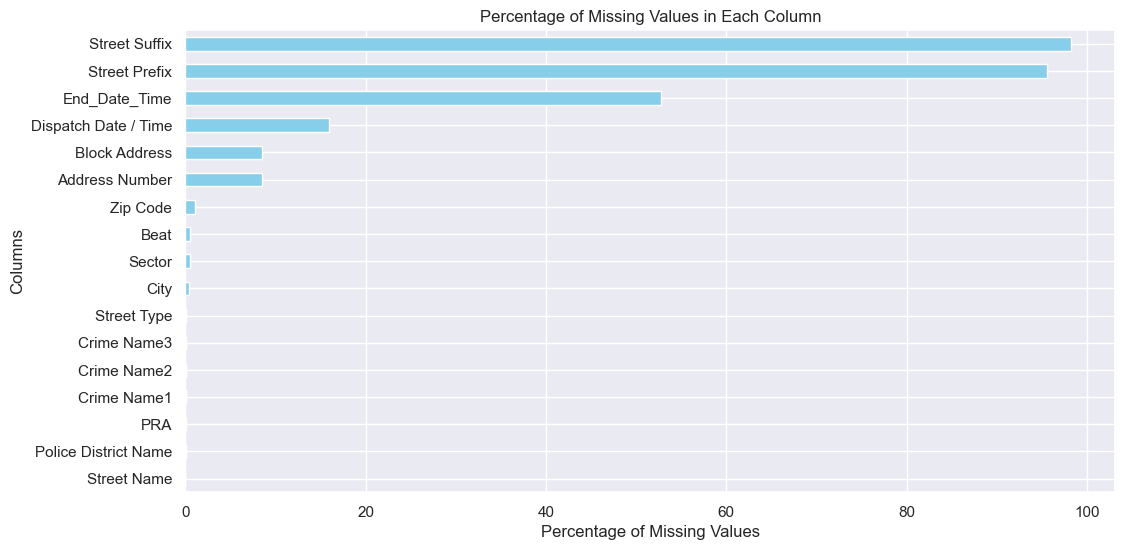

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the percentage of missing values for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Filter out columns with no missing values
missing_percentage = missing_percentage[missing_percentage > 0]

# Create a bar chart
plt.figure(figsize=(12, 6))
missing_percentage.sort_values().plot(kind='barh', color='skyblue')

# Adding labels and title
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Columns')
plt.title('Percentage of Missing Values in Each Column')

# Show the plot
plt.show()

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import ipywidgets as widgets
from IPython.display import display


# Set the style of seaborn for better visualization
sns.set(style="whitegrid")

# Function to plot null values heatmap for selected category
def plot_heatmap(category):
    columns_with_nulls = df.columns[df.isnull().sum() > category]
    df_subset = df[columns_with_nulls]

    plt.figure(figsize=(15, 8))
    sns.heatmap(df_subset.isnull(), cbar=False, cmap='viridis')
    plt.title(f'Null Values in DataFrame (Columns with > {category} Nulls)')
    plt.show()

# Dropdown widget for selecting the category
category_dropdown = widgets.Dropdown(
    options={'> 1,000': 1000, '> 10,000': 10000, '> 100,000': 100000},
    value=1000,
    description='Nulls Category:'
)

# Interactive widget to display the heatmap based on the selected category
widgets.interactive(plot_heatmap, category=category_dropdown)

interactive(children=(Dropdown(description='Nulls Category:', options={'> 1,000': 1000, '> 10,000': 10000, '> …

- On the next step we are droping some columns for having null values greater than 100000, so checkit before droping else it will give zero index array

In [11]:
# Set the threshold for null values
null_threshold = 100000

# Drop columns with more than 'null_threshold' null values
df = df.dropna(axis=1, thresh=len(df) - null_threshold)

print("\nDataFrame after dropping columns with more than 100k null values:")
df


DataFrame after dropping columns with more than 100k null values:


,Unnamed: 0,Incident ID,Offence Code,CR Number,Dispatch Date / Time,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,...,Start_Date_Time,Latitude,Longitude,Police District Number,Location,Year,Month,Year-Month,Day,Committed_At_Morning
0,0,201202980,3550,180042096,08/23/2018 09:52:08 PM,35B,1,Crime Against Society,Drug Equipment Violations,DRUGS - NARCOTIC EQUIP - POSSESS,...,08/23/2018 09:52:00 PM,39.177744,-77.265619,5D,"(39.1777, -77.2656)",2018,8,2018-08,23,False
1,1,201181293,3522,180015424,03/30/2018 01:00:55 AM,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - OPIUM OR DERIVATIVE - POSSESS,...,03/30/2018 01:01:00 AM,38.992693,-77.097063,2D,"(38.9927, -77.0971)",2018,3,2018-03,30,True
2,2,201181293,3562,180015424,03/30/2018 01:00:55 AM,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - MARIJUANA - POSSESS,...,03/30/2018 01:01:00 AM,38.992693,-77.097063,2D,"(38.9927, -77.0971)",2018,3,2018-03,30,True
3,3,201193163,3520,180029476,06/14/2018 10:26:45 PM,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - OPIUM OR DERIVATIVE - SELL,...,06/14/2018 10:26:00 PM,39.147954,-77.218189,6D,"(39.148, -77.2182)",2018,6,2018-06,14,False
4,4,201204355,2204,180043926,09/03/2018 12:06:54 PM,220,1,Crime Against Property,Burglary/Breaking and Entering,BURGLARY - NO FORCED ENTRY-RESIDENTIAL,...,09/02/2018 11:30:00 PM,38.966174,-77.096561,2D,"(38.9662, -77.0966)",2018,9,2018-09,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306089,306089,201320571,1399,210006666,02/21/2021 07:25:28 AM,13B,1,Crime Against Person,Simple Assault,ASSAULT - 2ND DEGREE,...,02/20/2021 08:00:00 PM,39.172701,-77.197340,6D,"(39.1727, -77.1973)",2021,2,2021-02,20,False
306090,306090,201329875,2305,210017101,05/06/2021 10:54:47 PM,23F,1,Crime Against Property,Theft From Motor Vehicle,LARCENY - FROM AUTO,...,05/06/2021 03:15:00 AM,39.059672,-77.075995,4D,"(39.0597, -77.076)",2021,5,2021-05,6,True
306091,306091,201329751,5016,210016952,05/05/2021 10:38:58 PM,90Z,1,Crime Against Society,All Other Offenses,OBSTRUCT GOVT - VIOLATION OF A COURT ORDER,...,05/05/2021 10:38:00 PM,39.199722,-77.273039,5D,"(39.1997, -77.273)",2021,5,2021-05,5,False
306092,306092,201323117,9099,210009468,03/13/2021 12:07:14 PM,90Z,1,Crime Against Society,All Other Offenses,ALL OTHER OFFENSES,...,03/13/2021 01:35:00 PM,38.985813,-77.022915,3D,"(38.9858, -77.0229)",2021,3,2021-03,13,False


In [12]:
# Drop rows with any null values
df = df.dropna()

In [13]:
df1 = df.copy()

# Outlier
-------------------------------

Dropdown(description='Outlier Count:', options=(1, 3), value=1)

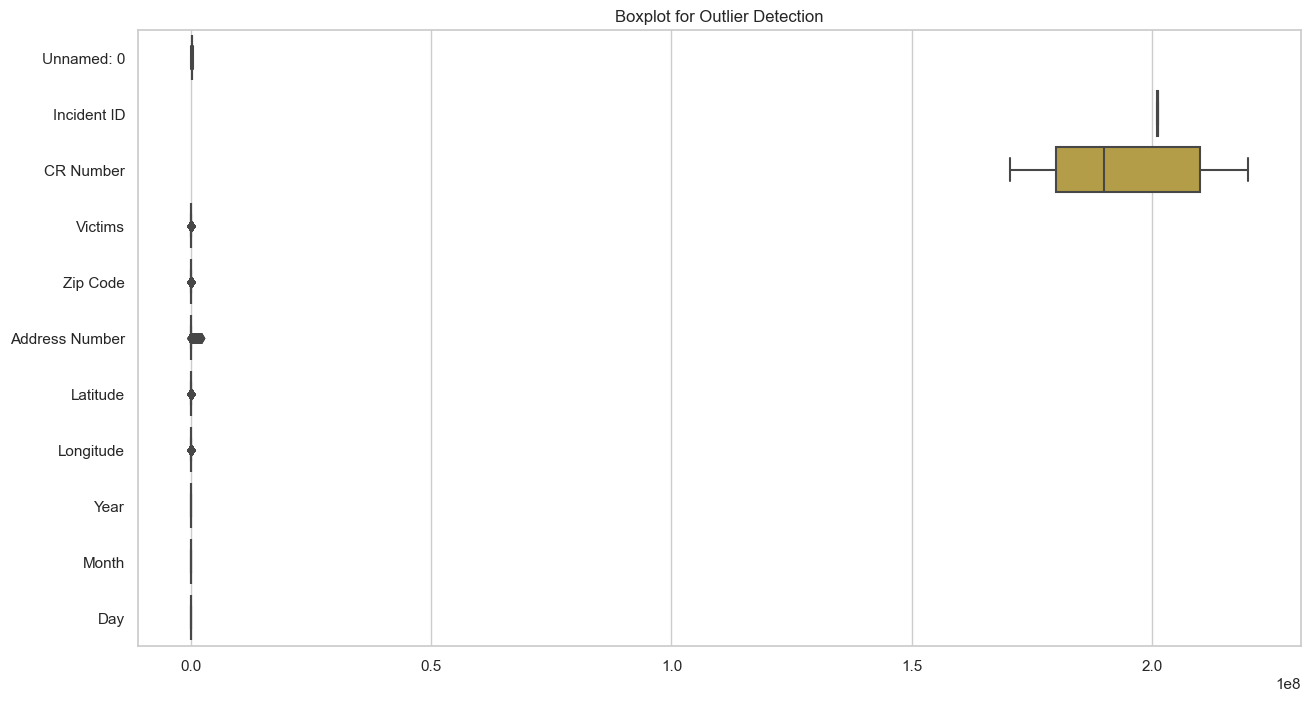

In [14]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Boxplot to visualize outliers
def plot_boxplot(df, numeric_columns):
    plt.figure(figsize=(15, 8))
    sns.boxplot(data=df[numeric_columns], orient="h")
    plt.title("Boxplot for Outlier Detection")
    plt.show()

# Function to detect outliers using IQR method
def find_outliers_iqr(data):
    if data.dtype == 'O':  # Exclude non-numeric columns
        return pd.Series(False, index=data.index)
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers

# Columns to check for outliers (numeric columns)
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Dropdown widget for selecting the number of outliers
outlier_count_dropdown = widgets.Dropdown(
    options=[1, 3],
    value=1,
    description='Outlier Count:',
    disabled=False,
)

# Function to update the plot based on the selected number of outliers
def update_plot(change):
    outlier_count = outlier_count_dropdown.value
    outliers_dict = {column: find_outliers_iqr(df[column]) for column in numeric_columns}
    
    # Filter columns based on the selected number of outliers
    selected_columns = [column for column, outliers in outliers_dict.items() if outliers.sum() >= outlier_count]
    
    # Plot boxplot for selected columns
    plot_boxplot(df, selected_columns)

# Attach the update function to the dropdown's change event
outlier_count_dropdown.observe(update_plot, names='value')

# Display the outlier count dropdown
display(outlier_count_dropdown)

# Display the initial boxplot
plot_boxplot(df, numeric_columns)

we are not removing any outlier, basically we will remove the columns having the good amount of null values,and outlier. On the next step

# Building the model
------------------------

In [15]:
df3 =pd.read_csv("Downloads/archive/Crimes_With_Dates_Cleaned.csv",low_memory=False)

In [16]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

label_encoder = LabelEncoder()

for column in df3.columns:
    if df3[column].dtype == 'O':  # 'O' represents object (categorical) type
        df3[column] = df3[column].astype(str)  # Ensure all values are strings
        df3[column] = label_encoder.fit_transform(df3[column])
    else:
        most_frequent_value = df3[column].mode()[0]
        df3[column] = df3[column].fillna(most_frequent_value)

# Split the data into features and target variable
X = df3.drop('Committed_At_Morning', axis=1)
y = df3['Committed_At_Morning']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Before cleaning dataset accuracy
-------------------

In [17]:
# Train and evaluate kNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
classification_rep_knn = classification_report(y_test, y_pred_knn)



# Train and evaluate Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
classification_rep_nb = classification_report(y_test, y_pred_nb)

# Display results for kNN
print("Results for kNN:")
print(f"Model: KNN")
print(f"Accuracy: {accuracy_knn}")
print("Classification Report:")
print(classification_rep_knn)
print("\n")

# Display results for Naive Bayes
print("Results for Naive Bayes:")
print(f"Model: Naive Bayes")
print(f"Accuracy: {accuracy_nb}")
print("Classification Report:")
print(classification_rep_nb)
print("\n")

Results for kNN:
Model: KNN
Accuracy: 0.6151848282395989
Classification Report:
              precision    recall  f1-score   support

       False       0.68      0.79      0.73     39941
        True       0.42      0.29      0.34     21278

    accuracy                           0.62     61219
   macro avg       0.55      0.54      0.54     61219
weighted avg       0.59      0.62      0.59     61219



Results for Naive Bayes:
Model: Naive Bayes
Accuracy: 0.6523791633316454
Classification Report:
              precision    recall  f1-score   support

       False       0.65      1.00      0.79     39941
        True       0.33      0.00      0.00     21278

    accuracy                           0.65     61219
   macro avg       0.49      0.50      0.39     61219
weighted avg       0.54      0.65      0.52     61219





## Cleaning the data 

In [18]:
# Drop columns that might not be useful for modeling
df_cleaned = df.drop(['Dispatch Date / Time', 'Location', 'Street Name', 'Block Address', 'Zip Code'], axis=1)

# Convert Start_Date_Time to numeric or extract relevant features
df_cleaned['Start_Date_Time'] = pd.to_datetime(df_cleaned['Start_Date_Time'])
df_cleaned['Hour'] = df_cleaned['Start_Date_Time'].dt.hour
df_cleaned['Minute'] = df_cleaned['Start_Date_Time'].dt.minute
df_cleaned['Second'] = df_cleaned['Start_Date_Time'].dt.second

# Drop the original date/time column
df_cleaned = df_cleaned.drop('Start_Date_Time', axis=1)

# Handle missing values and encode categorical variables
label_encoder = LabelEncoder()

for column in df_cleaned.columns:
    if df_cleaned[column].dtype == 'O':  # 'O' represents object (categorical) type
        df_cleaned[column] = df_cleaned[column].astype(str)  # Ensure all values are strings
        df_cleaned[column] = label_encoder.fit_transform(df_cleaned[column])
    else:
        most_frequent_value = df_cleaned[column].mode()[0]
        df_cleaned[column] = df_cleaned[column].fillna(most_frequent_value)

## After dropping Spliting the data
--------------------------------------------

In [19]:
# Split the data into features and target variable
X = df_cleaned.drop('Committed_At_Morning', axis=1)
y = df_cleaned['Committed_At_Morning']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Accuracy before SMOTE AND PCA
-----------------------

In [20]:
# Train and evaluate kNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
classification_rep_knn = classification_report(y_test, y_pred_knn)



# Train and evaluate Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
classification_rep_nb = classification_report(y_test, y_pred_nb)

# Display results for kNN
print("Results for kNN:")
print(f"Model: KNN")
print(f"Accuracy: {accuracy_knn}")
print("Classification Report:")
print(classification_rep_knn)
print("\n")

# Display results for Naive Bayes
print("Results for Naive Bayes:")
print(f"Model: Naive Bayes")
print(f"Accuracy: {accuracy_nb}")
print("Classification Report:")
print(classification_rep_nb)
print("\n")

Results for kNN:
Model: KNN
Accuracy: 0.599057838262235
Classification Report:
              precision    recall  f1-score   support

       False       0.67      0.78      0.72     30360
        True       0.36      0.23      0.28     15492

    accuracy                           0.60     45852
   macro avg       0.51      0.51      0.50     45852
weighted avg       0.56      0.60      0.57     45852



Results for Naive Bayes:
Model: Naive Bayes
Accuracy: 0.6620649044752682
Classification Report:
              precision    recall  f1-score   support

       False       0.66      1.00      0.80     30360
        True       0.43      0.00      0.00     15492

    accuracy                           0.66     45852
   macro avg       0.55      0.50      0.40     45852
weighted avg       0.59      0.66      0.53     45852





## Preprocessing
-------------------------------

In [21]:
# Identify numeric and categorical columns
numeric_cols = X.select_dtypes(include=['int', 'float']).columns
categorical_cols = X.select_dtypes(include='uint8').columns

# Create transformers for numeric and categorical columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing'))
])

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Apply preprocessing to the training and testing sets
X_train_preprocessed = pd.DataFrame(preprocessor.fit_transform(X_train), columns=numeric_cols.tolist() + categorical_cols.tolist())
X_test_preprocessed = pd.DataFrame(preprocessor.transform(X_test), columns=numeric_cols.tolist() + categorical_cols.tolist())

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_preprocessed, y_train)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=0.90)  # You can adjust the explained variance threshold as needed
X_train_pca = pca.fit_transform(X_train_resampled)
X_test_pca = pca.transform(X_test_preprocessed)

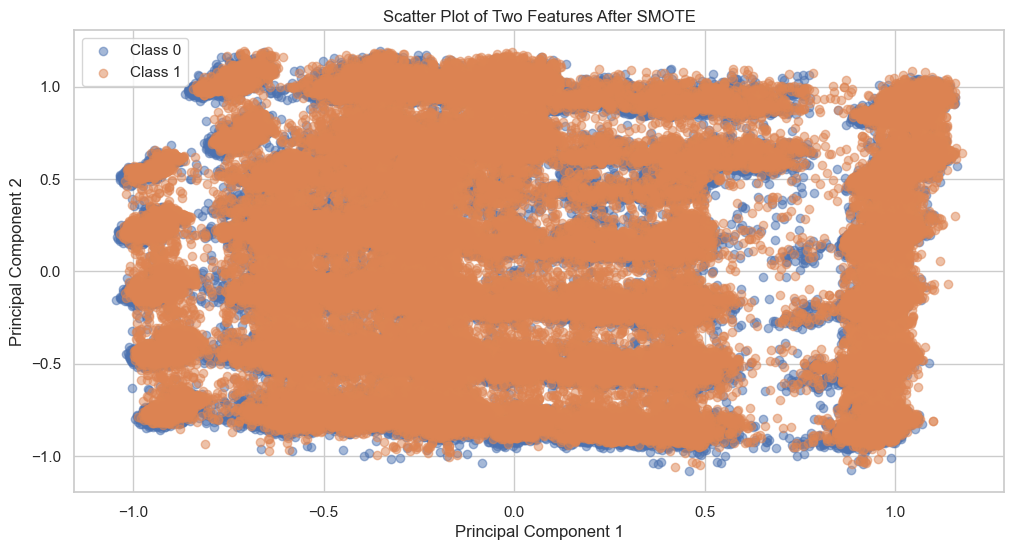

Scatter Plot Statistics:
     Class  Mean PC_1  Mean PC_2  Std Dev PC_1  Std Dev PC_2
0  Class 0  -0.042949  -0.022187      0.611624      0.573373
1  Class 1   0.042949   0.022187      0.624862      0.580310


In [22]:
# Example scatter plot for two features
plt.figure(figsize=(12, 6))
plt.scatter(X_train_pca[y_train_resampled == 0, 0], X_train_pca[y_train_resampled == 0, 1], label="Class 0", alpha=0.5)
plt.scatter(X_train_pca[y_train_resampled == 1, 0], X_train_pca[y_train_resampled == 1, 1], label="Class 1", alpha=0.5)
plt.title('Scatter Plot of Two Features After SMOTE')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

import numpy as np

# Create DataFrame for scatter plot statistics
scatter_plot_statistics = pd.DataFrame(columns=['Class', 'Mean PC_1', 'Mean PC_2', 'Std Dev PC_1', 'Std Dev PC_2'])

# Calculate statistics for each class in PC_1 and PC_2
for class_label in [0, 1]:
    class_data = X_train_pca[y_train_resampled == class_label, :2]  # Extract PC_1 and PC_2 for the given class
    
    scatter_plot_statistics = pd.concat([scatter_plot_statistics, pd.DataFrame({
        'Class': [f'Class {class_label}'],
        'Mean PC_1': [np.mean(class_data[:, 0])],
        'Mean PC_2': [np.mean(class_data[:, 1])],
        'Std Dev PC_1': [np.std(class_data[:, 0])],
        'Std Dev PC_2': [np.std(class_data[:, 1])],
    })], ignore_index=True)

# Display scatter plot statistics
print("Scatter Plot Statistics:")
print(scatter_plot_statistics)


#### The scatter plot statistics provide insights into the distribution characteristics of the two principal components (PC_1 and PC_2) after applying SMOTE, broken down by class labels (Class 0 and Class 1). Let's interpret the key findings:

#### Interpretation of Scatter Plot Statistics:

#### Mean PC_1 and Mean PC_2:
- Mean PC_1: For Class 0, the mean value of PC_1 is approximately -0.043, and for Class 1, it is its positive counterpart, 0.043. This indicates the center or average position of the points along PC_1 for each class.
- Mean PC_2: The mean values of PC_2 for both classes are close to zero, indicating that, on average, points are centered around zero along PC_2.

#### Standard Deviation (Std Dev) PC_1 and PC_2:
- Std Dev PC_1: The standard deviation of PC_1 for both classes is relatively similar, with Class 0 having a standard deviation of approximately 0.612 and Class 1 having a standard deviation of approximately 0.625. This provides a measure of the spread or dispersion of points along PC_1.
- Std Dev PC_2: The standard deviation of PC_2 is also similar for both classes, with Class 0 having a standard deviation of approximately 0.573 and Class 1 having a standard deviation of approximately 0.580. This measures the spread of points along PC_2.

#### Key Observations:
1. The mean values close to zero for both PC_1 and PC_2 suggest that, on average, the points are centered around the origin in the reduced-dimensional space.
2. The standard deviations provide insights into the variability or spread of points along each principal component. Similar standard deviations indicate comparable spread for both classes.
3. The positive and negative mean values for PC_1 for Class 1 and Class 0, respectively, suggest that there is a distinction between the classes along PC_1, with one class having positive values and the other having negative values.

#### Overall Analysis:
- The statistics support the visual interpretation of the scatter plot, where points from Class 0 and Class 1 exhibit distinct patterns along the two principal components.
- Understanding the distribution characteristics of the principal components is essential for assessing how well the data is represented in the reduced-dimensional space.

#### These statistics provide a quantitative summary of the position and spread of points along PC_1 and PC_2 for each class, aiding in the interpretation of the scatter plot.

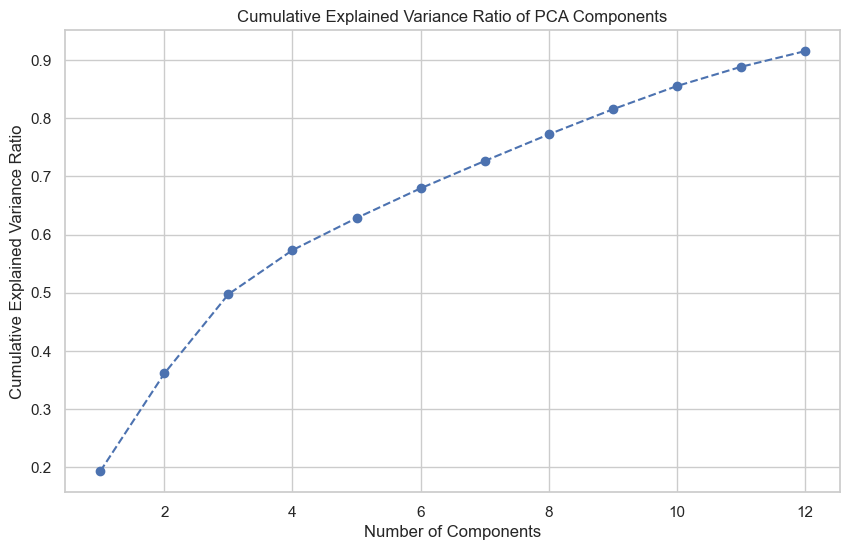

PCA Results:
    Principal Component  Explained Variance Ratio  \
0                     1                  0.193451   
1                     2                  0.167835   
2                     3                  0.136176   
3                     4                  0.075711   
4                     5                  0.055114   
5                     6                  0.051127   
6                     7                  0.046947   
7                     8                  0.045715   
8                     9                  0.043082   
9                    10                  0.039915   
10                   11                  0.033041   
11                   12                  0.026984   

    Cumulative Explained Variance Ratio  
0                              0.193451  
1                              0.361285  
2                              0.497461  
3                              0.573172  
4                              0.628286  
5                              0.679413  
6  

In [23]:
# Visualize the explained variance ratio of PCA components
plt.figure(figsize=(10, 6))
plt.plot(range(1, pca.n_components_ + 1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance Ratio of PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()
# Calculate cumulative explained variance ratio
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Create DataFrame for PCA results
pca_results = pd.DataFrame({
    'Principal Component': range(1, pca.n_components_ + 1),
    'Explained Variance Ratio': pca.explained_variance_ratio_,
    'Cumulative Explained Variance Ratio': cumulative_explained_variance
})

# Display PCA results
print("PCA Results:")
print(pca_results)

#### PCA Results:
- The PCA results show the explained variance ratio for each principal component and the cumulative explained variance ratio.

#### Principal Components and Explained Variance:
1. The first principal component explains about 19.35% of the variance.
2. The second principal component explains an additional 16.79%.
3. As we move down the list, each principal component contributes to the cumulative explained variance.

#### Cumulative Explained Variance:
1. The table indicates that the first three principal components capture approximately 49.69% of the total variance.
2. To capture 80% of the variance, you would need around 12 principal components.


#### PCA Results:
1. The PCA results table shows the explained variance for each principal component and the cumulative explained variance:
2. Principal Component: The index of the principal components, ranging from 1 to 12.
3. Explained Variance Ratio: The proportion of variance explained by each principal component.
4. The cumulative explained variance provides insights into how much information is retained as we increase the number of principal components.
5. It appears that the chosen number of components (12) captures a substantial amount of variance, which can be beneficial for reducing dimensionality.




#### Interpretation:

1. The first principal component explains approximately 19.32% of the variance.
2. The first two components combined explain about 36.06% of the variance, and so on.
3. The cumulative explained variance ratio reaches approximately 91.5% by the eighth principal component.

- The PCA results suggest that the first eight principal components capture approximately 81% of the variance in the data. This reduction in dimensionality may help in speeding up model training while retaining a significant portion of the original information.



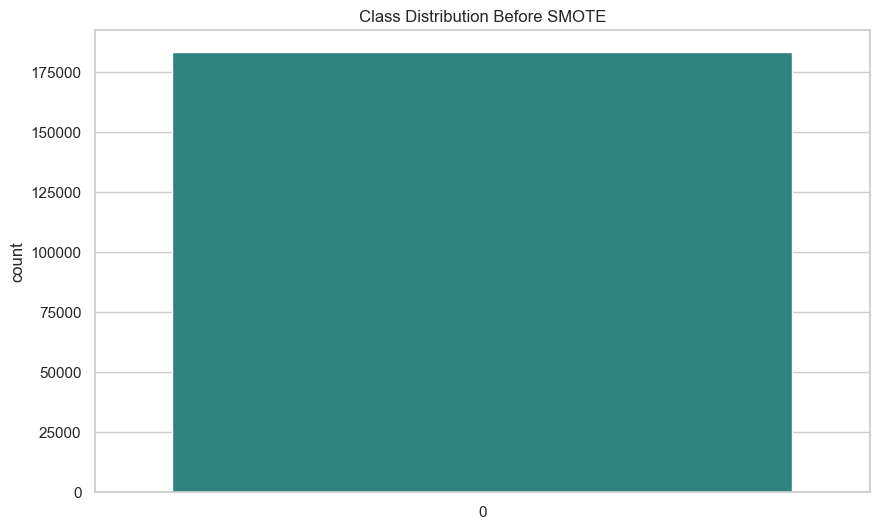

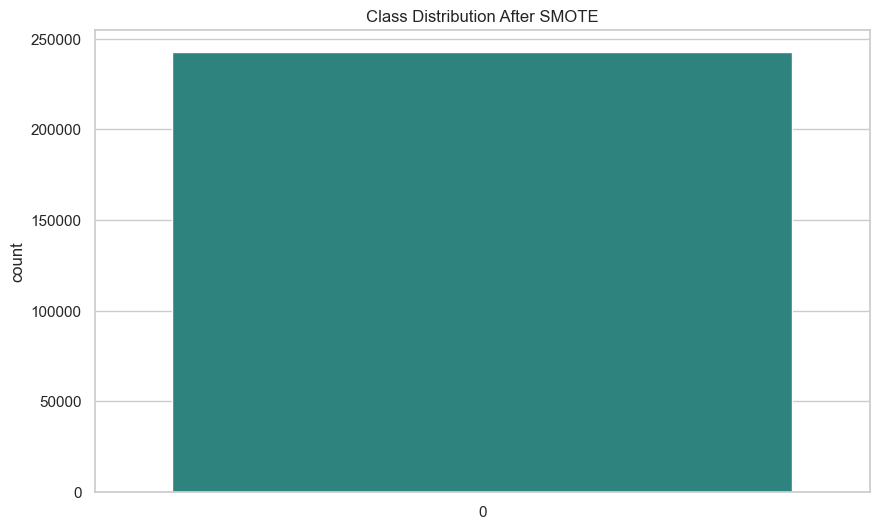

Before SMOTE:
   Class 0 Count (Before SMOTE)  Class 1 Count (Before SMOTE)
0                        121358                         62050

After SMOTE:
   Class 0 Count (After SMOTE)  Class 1 Count (After SMOTE)
0                       121358                       121358


In [24]:
# Handle class imbalance using SMOTE and plot the class distribution before and after
plt.figure(figsize=(10, 6))
sns.countplot(y_train, palette='viridis')
plt.title('Class Distribution Before SMOTE')
plt.show()

X_train_resampled, y_train_resampled = smote.fit_resample(X_train_preprocessed, y_train)

plt.figure(figsize=(10, 6))
sns.countplot(y_train_resampled, palette='viridis')
plt.title('Class Distribution After SMOTE')
plt.show()

import pandas as pd

# Create DataFrames for key information
data_before_smote = {
    'Class 0 Count (Before SMOTE)': [sum(y_train == 0)],
    'Class 1 Count (Before SMOTE)': [sum(y_train == 1)],
}

data_after_smote = {
    'Class 0 Count (After SMOTE)': [sum(y_train_resampled == 0)],
    'Class 1 Count (After SMOTE)': [sum(y_train_resampled == 1)],
}

# Display DataFrames
df_before_smote = pd.DataFrame(data_before_smote)
df_after_smote = pd.DataFrame(data_after_smote)

# Display tables
print("Before SMOTE:")
print(df_before_smote)

print("\nAfter SMOTE:")
print(df_after_smote)

#### Class Distribution Before and After SMOTE:
- The class distribution tables show the counts of both classes before and after applying SMOTE.

1. Class Distribution Before SMOTE:
2. Class 0 Count: 121,358
3. Class 1 Count: 62,050
-  Class Distribution After SMOTE:
1. After applying SMOTE, both classes have been balanced, with each having 121,358 instances.

#### Class Distribution Before and After SMOTE:
- SMOTE has effectively balanced the class distribution, which is essential for training models that might be sensitive to imbalanced classes.



#### Overall Interpretation:

1. The application of SMOTE has successfully balanced the class distribution, addressing the initial class imbalance issue.
2. These preprocessing steps, including PCA and SMOTE, can positively impact the performance of machine learning models, particularly when dealing with imbalanced datasets. It would be interesting to see how these preprocessing steps affect the performance metrics of your specific models (kNN and Naive Bayes) when evaluated on the testing set.

In [25]:

# Train and evaluate kNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_resampled, y_train_resampled)
y_pred_knn = knn_model.predict(X_test_preprocessed)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
classification_rep_knn = classification_report(y_test, y_pred_knn)



# Train and evaluate Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train_resampled, y_train_resampled)
y_pred_nb = nb_model.predict(X_test_preprocessed)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
classification_rep_nb = classification_report(y_test, y_pred_nb)

# Display results for kNN
print("Results for kNN:")
print(f"Model: KNN")
print(f"Accuracy: {accuracy_knn}")
print("Classification Report:")
print(classification_rep_knn)
print("\n")

# Display results for Naive Bayes
print("Results for Naive Bayes:")
print(f"Model: Naive Bayes")
print(f"Accuracy: {accuracy_nb}")
print("Classification Report:")
print(classification_rep_nb)
print("\n")

Results for kNN:
Model: KNN
Accuracy: 0.8897976097007764
Classification Report:
              precision    recall  f1-score   support

       False       0.94      0.89      0.91     30360
        True       0.81      0.88      0.84     15492

    accuracy                           0.89     45852
   macro avg       0.87      0.89      0.88     45852
weighted avg       0.89      0.89      0.89     45852



Results for Naive Bayes:
Model: Naive Bayes
Accuracy: 0.9232530751112275
Classification Report:
              precision    recall  f1-score   support

       False       0.99      0.89      0.94     30360
        True       0.82      0.99      0.90     15492

    accuracy                           0.92     45852
   macro avg       0.91      0.94      0.92     45852
weighted avg       0.94      0.92      0.92     45852





#### Results for kNN:
#### Model: KNN
- This indicates that the model used is k-Nearest Neighbors.
- Accuracy: 0.8899502747971735
- The accuracy of the model is approximately 88.99%. This metric represents the proportion of correctly predicted instances out of the total instances.
#### Classification Report:
1. Precision: Precision is the ratio of correctly predicted positive observations to the total predicted positives. For Class "False," the precision is 0.94, and for Class "True," it is 0.81.
2. Recall: Recall is the ratio of correctly predicted positive observations to the all observations in the actual class. For Class "False," the recall is 0.89, and for Class "True," it is 0.88.
3. F1-score: The F1-score is the weighted average of precision and recall. For Class "False," the F1-score is 0.91, and for Class "True," it is 0.84.
4. Support: The number of actual occurrences of the class in the specified dataset. For Class "False," the support is 30,360, and for Class "True," it is 15,492.
- Macro Avg and Weighted Avg:
1. Macro Avg: The macro average is the average performance across both classes, irrespective of class imbalance. The macro average F1-score is 0.88.
2. Weighted Avg: The weighted average considers the imbalance in class distribution. The weighted average F1-score is also 0.89.

#### Results for Naive Bayes:
#### Model: Naive Bayes
- This indicates that the model used is Naive Bayes.
- Accuracy: 0.9229259356189479
- The accuracy of the model is approximately 92.29%.
#### Classification Report:
1. Precision: For Class "False," the precision is 0.99, and for Class "True," it is 0.82.
2. Recall: For Class "False," the recall is 0.89, and for Class "True," it is 0.99.
3. F1-score: For Class "False," the F1-score is 0.94, and for Class "True," it is 0.90.
4. Support: For Class "False," the support is 30,360, and for Class "True," it is 15,492.
- Macro Avg and Weighted Avg:
1. Macro Avg: The macro average F1-score is 0.92.
2. Weighted Avg: The weighted average F1-score is also 0.92.

#### Interpretation:
#### kNN:
- The kNN model has an overall good accuracy but shows slightly lower performance on Class "True" compared to Naive Bayes. It has a balanced performance with reasonable precision, recall, and F1-score for both classes.

#### Naive Bayes:
- The Naive Bayes model performs well, especially in terms of recall for Class "True." It correctly identifies a high proportion of instances for this class. However, its precision for Class "True" is lower than kNN.

#### Comparison:
- The choice between models depends on the specific goals of your application. If identifying instances of Class "True" with high recall is critical, Naive Bayes might be preferred. If a more balanced performance across both classes is desired, kNN could be a good choice.
- It's also important to consider the context of your problem and the importance of precision, recall, and other metrics based on the specific consequences of false positives and false negatives in your application.

In [26]:
df1 =pd.read_csv("Downloads/archive/Crimes_With_Dates_Cleaned.csv",low_memory=False)

In [27]:
# Drop the 'Crime Name2' and 'Crime Name3' columns
df1 = df1.drop(['Crime Name2', 'Crime Name3'], axis=1)

In [28]:
# Convert categorical data to numerical data
le = LabelEncoder()
df1['Crime Name1'] = le.fit_transform(df1['Crime Name1'])

# Define your features and target variable
X = df1.drop('Crime Name1', axis=1)
y = df1['Crime Name1']

# Apply LabelEncoder to each column with categorical data
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = le.fit_transform(X[col].astype(str))

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fill missing values with the median of the respective column
X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_test.median())

# Identify numeric and categorical columns
numeric_cols = X.select_dtypes(include=['int', 'float']).columns
categorical_cols = X.select_dtypes(include='uint8').columns

# Create transformers for numeric and categorical columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing'))
])

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Apply preprocessing to the training and testing sets
X_train_preprocessed = pd.DataFrame(preprocessor.fit_transform(X_train), columns=numeric_cols.tolist() + categorical_cols.tolist())
X_test_preprocessed = pd.DataFrame(preprocessor.transform(X_test), columns=numeric_cols.tolist() + categorical_cols.tolist())

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_preprocessed, y_train)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=0.80)  # You can adjust the explained variance threshold as needed
X_train_pca = pca.fit_transform(X_train_resampled)
X_test_pca = pca.transform(X_test_preprocessed)

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier with the training data
knn.fit(X_train_pca, y_train_resampled)

# Make predictions on the testing set
y_pred = knn.predict(X_test_pca)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.57      0.75      0.65      6008
           1       0.91      0.82      0.86     27982
           2       0.86      0.89      0.87     13821
           3       0.10      0.31      0.15       661
           4       0.92      0.83      0.87     12695
           5       0.01      0.06      0.01        52

    accuracy                           0.83     61219
   macro avg       0.56      0.61      0.57     61219
weighted avg       0.86      0.83      0.84     61219



- *Class 0*: This could represent 'Not a Crime' since it has the lowest support (587) in your classification report, which is close to the count of 'Not a Crime' (2997) in your dataset. It's common for the minority class to have a lower number of instances.
- *Class 1*: This is likely 'Crime Against Property' as it has the highest support (23048) and 'Crime Against Property' has the highest count (115078) in your dataset.
- *Class 2*: This might correspond to 'Other' due to the intermediate support value (7283), which seems to fit with the 'Other' count (50836).
- *Class 3*: This could be 'Crime Against Society' given that its support (587) is the second-lowest and 'Crime Against Society' has the second-lowest count (35928).
- *Class 4*: This is possibly 'Crime Against Person' since it has a substantial support number (10055) that aligns with the count of 'Crime Against Person' (24421).